### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [75]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [76]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')  


# View the DataFrame.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [77]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [78]:
# Explore the data.
print(reviews)

      gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  produ

In [79]:
# Descriptive statistics.

In [80]:
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [81]:
# Drop unnecessary columns.
reviewsnew = reviews.drop(['language', 'platform'], axis=1)  


# View column names.
reviewsnew.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 3. Rename columns

In [82]:
# Rename the column headers.
reviewsnew = reviewsnew.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})


# View column names.
print(reviewsnew)

      gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0      

## 4. Save the DataFrame as a CSV file

In [83]:
# Create a CSV file as output.
reviewsnew.to_csv('reviewsnew.csv', index=False)

In [84]:
# Import new CSV file with Pandas.
reviewsnew1 = pd.read_csv('reviewsnew.csv')  


# View DataFrame.
print(reviewsnew1)

      gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0      

## 5. Linear regression

In [85]:
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

### 5a) spending vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        23:56:15   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

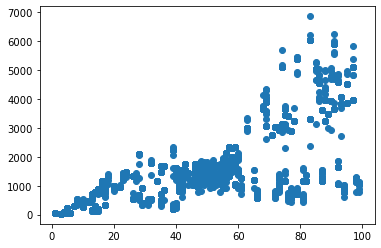

In [12]:
# Independent variable.
X = reviewsnew1["spending_score"]

# Dependent variable.
y = reviewsnew1["loyalty_points"] 

# Check for linearity.
plt.scatter(X,y)


# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = reviewsnew1).fit()

# View the output.
test.summary()


In [13]:
# Extract the estimated parameters.
params = test.params
print(params)

# Extract the standard errors.
se = test.bse
print(se)

# Extract the predicted values.
y_pred = test.fittedvalues
print(y_pred)



Intercept   -75.052663
X            33.061693
dtype: float64
Intercept    45.930554
X             0.814419
dtype: float64
0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Length: 2000, dtype: float64


In [14]:
# Set the X coefficient and the constant to generate the regression table.
# View the output.
print(test.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        23:56:17   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.1

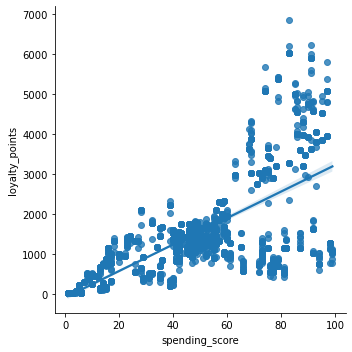

In [15]:
# Plot the graph with a regression line.
sns.lmplot(x='spending_score', y='loyalty_points', data=reviewsnew1)
plt.show()

### 5b) renumeration vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        23:56:21   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

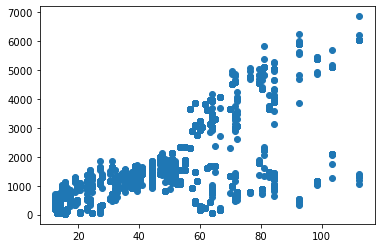

In [16]:
# Independent variable.
X = reviewsnew1["remuneration"]

# Dependent variable.
y = reviewsnew1["loyalty_points"] 

# Check for linearity.
plt.scatter(X,y)


# OLS model and summary.
f = 'y ~ X'
test1 = ols(f, data = reviewsnew1).fit()

# View the output.
test1.summary()


In [17]:
# Extract the estimated parameters.
params1 = test1.params
print(params1)

# Extract the standard errors.
se1 = test1.bse
print(se1)

# Extract the predicted values.
y_pred1 = test.fittedvalues
print(y_pred1)


Intercept   -65.686513
X            34.187825
dtype: float64
Intercept    52.170717
X             0.977925
dtype: float64
0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Length: 2000, dtype: float64


In [18]:
# Set the X coefficient and the constant to generate the regression table.
# View the output.
print(test1.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        23:56:23   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.2

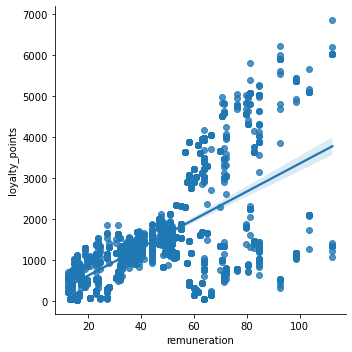

In [19]:
# Plot the graph with a regression line.
sns.lmplot(x='remuneration', y='loyalty_points', data=reviewsnew1)
plt.show()

### 5c) age vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0577
Time:                        23:56:32   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

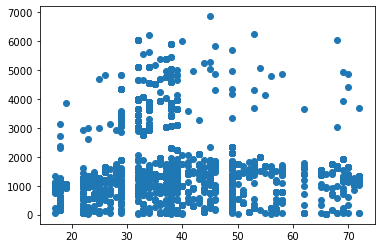

In [20]:
# Independent variable.
X = reviewsnew1["age"]

# Dependent variable.
y = reviewsnew1["loyalty_points"] 

# Check for linearity.
plt.scatter(X,y)


# OLS model and summary.
f = 'y ~ X'
test2 = ols(f, data = reviewsnew1).fit()

# View the output.
test2.summary()

In [21]:
# Extract the estimated parameters.
params2 = test2.params
print(params2)

# Extract the standard errors.
se2 = test2.bse
print(se2)

# Extract the predicted values.
y_pred2 = test.fittedvalues
print(y_pred2)

Intercept    1736.517739
X              -4.012805
dtype: float64
Intercept    88.248731
X             2.113177
dtype: float64
0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Length: 2000, dtype: float64


In [22]:
# Set the X coefficient and the constant to generate the regression table.
# View the output.
print(test2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0577
Time:                        23:56:36   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.0

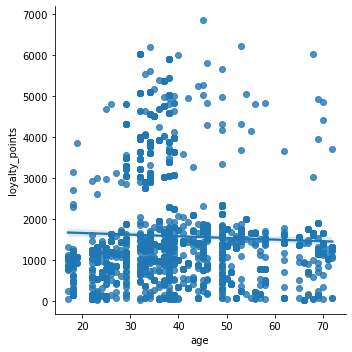

In [23]:
# Plot the graph with a regression line.
sns.lmplot(x='age', y='loyalty_points', data=reviewsnew1)
plt.show()

## 6. Observations and insights

***Your observations here...***






In [ ]:
# Our analysis of customer demographics revealed the following:

# Mean age: 39
# Mean remuneration: £30
# Mean spending score: 50
# Mean loyalty score: 1,578
# Our findings show that spending score and remuneration have a positive correlation with loyalty points.
# However, age did not significantly impact loyalty points in our model.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [24]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviewsnew.csv')

# View DataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [26]:
# Drop unnecessary columns.
df2new = df2.drop(columns=['gender', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary'])


# View DataFrame.
df2new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [27]:
# Explore the data.
print(df2new)


      remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]


In [28]:
# Descriptive statistics.
df2new.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

<AxesSubplot:xlabel='spending_score', ylabel='remuneration'>

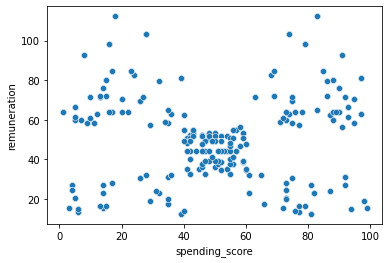

In [29]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spending_score',
                y='remuneration',
                data=df2new)

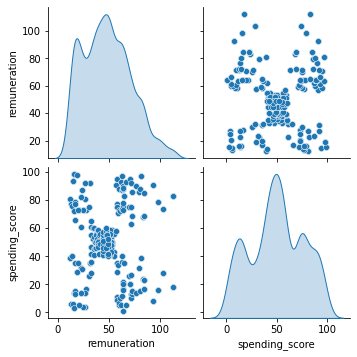

In [30]:
# Create a pairplot with Seaborn.
sns.pairplot(df2new,
             diag_kind='kde')

## 3. Elbow and silhoutte methods

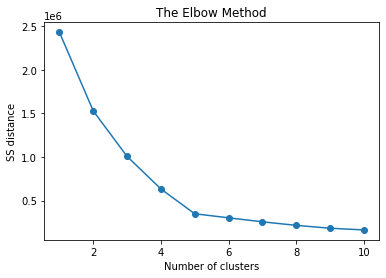

In [31]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(df2new)
    ss.append(kmeans.inertia_)
    
# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()


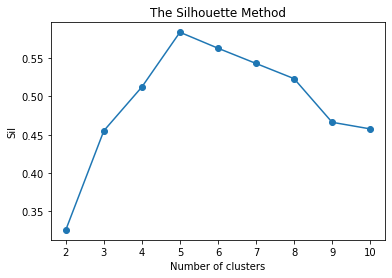

In [32]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10
    
for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(df2new)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2new,
                                labels,
                                metric='euclidean'))
    

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

In [33]:
### Let's set `k=4` four clusters).


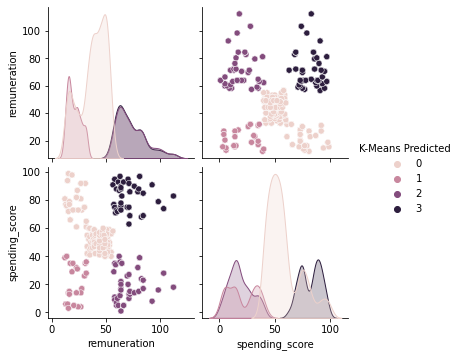

In [34]:
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2new)

clusters = kmeans.labels_

df2new['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2new,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [35]:
# Check the number of observations per predicted class.
df2new['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

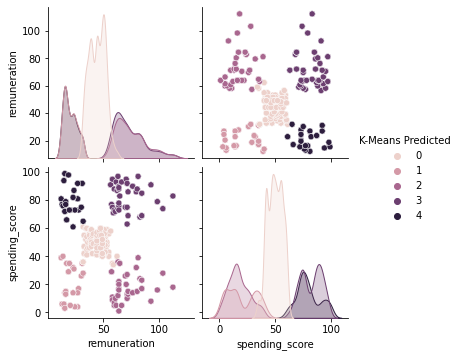

In [36]:
### Let's set `k=5` five clusters).
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2new)

clusters = kmeans.labels_

df2new['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2new,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [37]:
# Check the number of observations per predicted class.
df2new['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

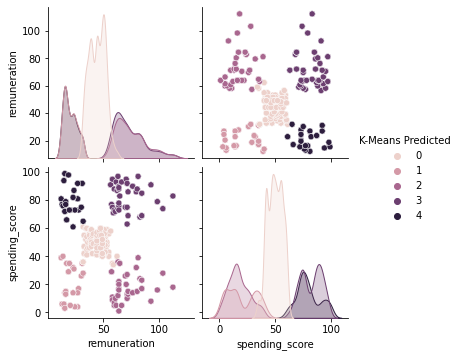

In [38]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2new)

clusters = kmeans.labels_

df2new['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2new,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [39]:
# Check the number of observations per predicted class.
df2new['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [40]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})


# View the DataFrame.
print(df2new.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<AxesSubplot:xlabel='spending_score', ylabel='remuneration'>

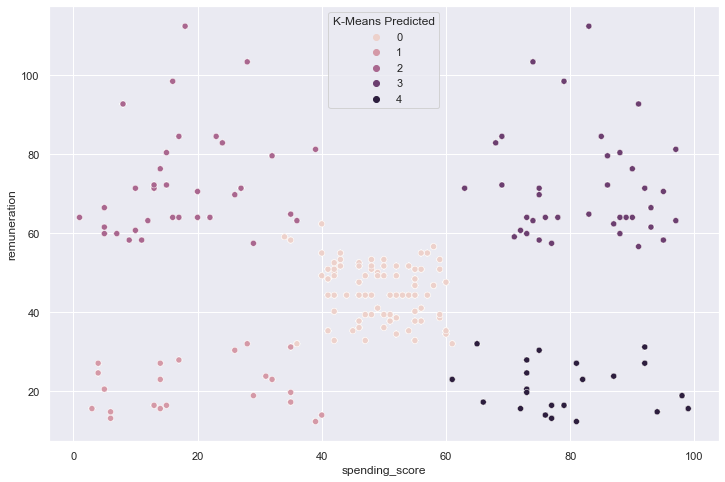

In [41]:
# Visualising the clusters.
# Create a scatterplot.
sns.scatterplot(x='spending_score' , 
                y ='remuneration',
                data=df2new,
                hue='K-Means Predicted')


## 7. Discuss: Insights and observations

***Your observations here...***

In [42]:
# We applied k-means clustering to the customer data, focusing on remuneration and spending scores to 
# identify distinct groups within the customer base. To determine the optimal number of clusters, 
# we used both the elbow method and the silhouette method.
# Our analysis indicated that five clusters provided the best fit, as they showed a clear 
# distinction of grouping between spending score and loyalty points in the graph, 
# resulting in a better distribution of customer groups.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [6]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load the data set as df3.
df3 = pd.read_csv('reviewsnew.csv')


# View DataFrame.
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [8]:
# Explore data set.
print(df3)

      gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0      

In [9]:
# Keep necessary columns. Drop unnecessary columns.
df3new = df3.drop(columns=['gender', 'age', 'loyalty_points', 'education', 'product', 'remuneration', 'spending_score'])


# View DataFrame.
df3new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [10]:
# Determine if there are any missing values.
df3new.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [11]:
# Review: Change all to lower case and join with a space.
df3new['review'] = df3new['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))


# View output.
df3new['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [12]:
# Summary: Change all to lower case and join with a space.
df3new['summary'] = df3new['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View output.
df3new['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [13]:
# Replace all the punctuations in review column.
df3new['review'] = df3new['review'].str.replace('[^\w\s]', '')


# View output.
df3new['review'].head()


0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [14]:
# Replace all the puncuations in summary column.
df3new['summary'] = df3new['summary'].str.replace('[^\w\s]', '')


# View output.
df3new['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [15]:
# Check the number of duplicate values in the review and summary columns.
df3new.review.duplicated().sum()

50

In [16]:
df3new.summary.duplicated().sum()


649

In [17]:
# Drop duplicates in both columns.
nondup = df3new.drop_duplicates(subset=['review', 'summary'])

# Preview data.
nondup.reset_index(inplace=True)
nondup.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [18]:
# View the shape of the data.
nondup.shape

(1961, 3)

## 3. Tokenise and create wordclouds

In [19]:
# Create new DataFrame (copy DataFrame).
df3copy = nondup.copy()


# View DataFrame.
print(df3copy)


      index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game did not think i would like it when ...   
1958   1997           great game for all keeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty b

In [20]:
# Apply tokenisation to both columns.
# Tokenise the words.
df3copy['review_tokens'] = df3copy['review'].apply(word_tokenize)
df3copy['summary_tokens'] = df3copy['summary'].apply(word_tokenize)

# Preview data.
df3copy.head()



index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       review_tokens  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      summary_tokens  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [21]:
# Review: Create a word cloud.

cloudreview = df3copy['review_tokens'].astype(str).str.cat(sep='')

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                min_font_size = 10).generate(cloudreview) 

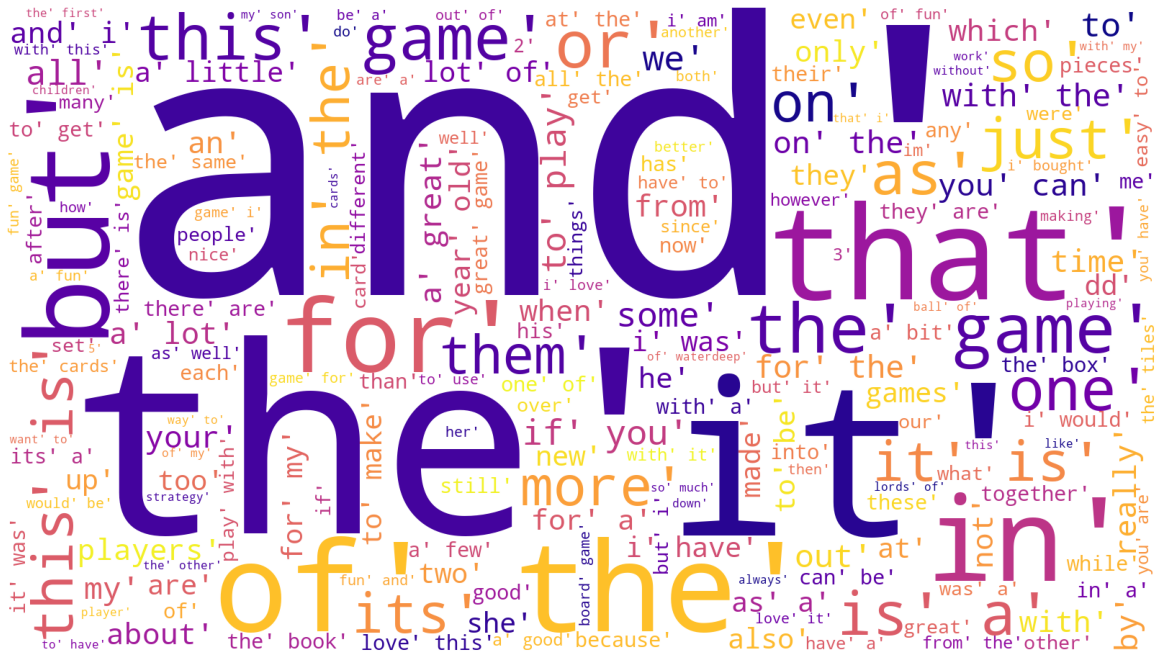

In [22]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [23]:
# Summary: Create a word cloud.
cloudsummary = df3copy['summary_tokens'].astype(str).str.cat(sep='')

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                min_font_size = 10).generate(cloudsummary) 

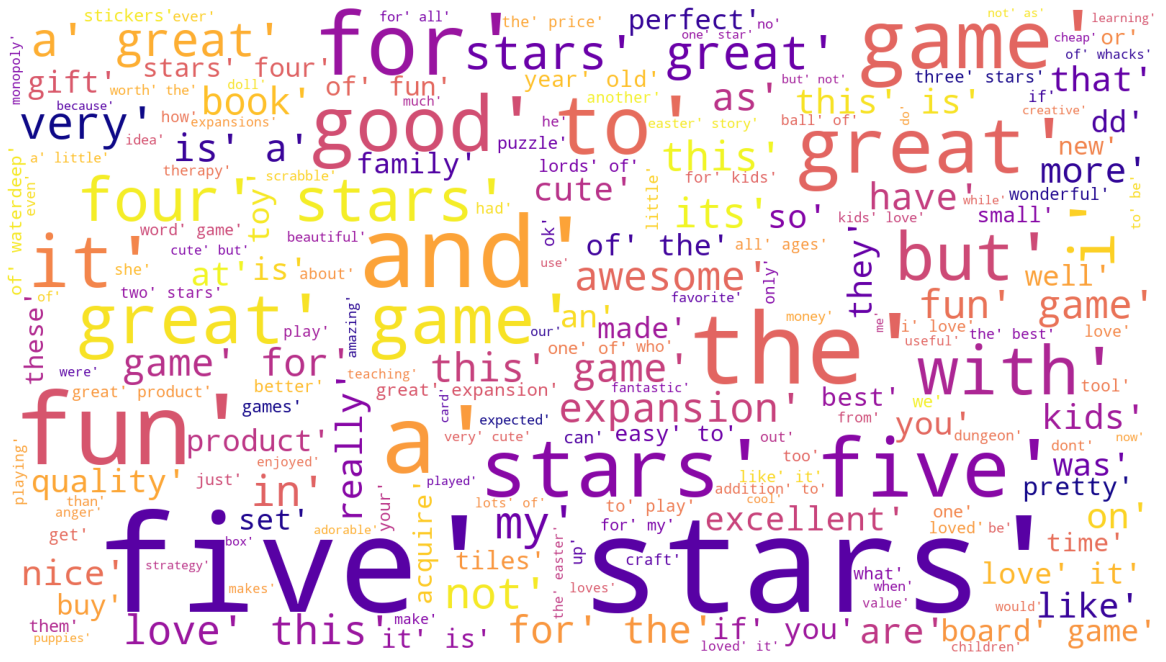

In [24]:
# Summary: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [25]:
# Define an empty list of tokens.
reviewtokens = []

for i in range(df3copy.shape[0]):
    # Add each token to the list.
    reviewtokens = reviewtokens + df3copy['review_tokens'][i]

In [26]:
# Import the FreqDist for reviews.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(reviewtokens)

# Preview data.
fdist

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [27]:
# Define an empty list of tokens.
summarytokens = []

for i in range(df3copy.shape[0]):
    # Add each token to the list.
    summarytokens = summarytokens + df3copy['summary_tokens'][i]

In [28]:
# Determine the frequency distribution for summary.
fdist2 = FreqDist(summarytokens)

# Preview data.
fdist2

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [29]:
# Delete all the alpanum.
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
summarytokens1 = [word for word in summarytokens if word.isalnum()]

In [30]:
reviewtokens1 = [word for word in reviewtokens if word.isalnum()]

In [31]:
# View DataFrame.
df3copy

index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game did not think i would like it when ...   
1958   1997           great game for all keeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1956      the perfect word game for mixed ages with mom   
1957                                          super fun   
1958                                         great game   
1959                                         four stars   
1960                                     love this game   

                                          review_tokens  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1956  [the, perfect, word, game, for, mixed, ages, w...   
1957  [great, game, did, not, think, i, would, like,...   
1958  [great, game, for, all, keeps, the, mind, nimble]   
1959                                        [fun, game]   
1960  [this, game, is, fun, a, lot, like, scrabble, ...   

                                         summary_tokens  
0     [the, fact, that, 50, of, this, space, is, was...  
1     [another, worthless, dungeon, masters, screen,...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1956  [the, perfect, word, game, for, mixed, ages, w...  
1957                                       [super, fun]  
1958                                      [great, game]  
1959                                      [four, stars]  
1960                                 [love, this, game]  

[1961 rows x 5 columns]

In [32]:
# Remove all the stopwords for review.
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
revtoken = [x for x in reviewtokens if x.lower() not in english_stopwords]

# Define an empty string variable.
revtoken_string = ''

for value in reviewtokens:
    # Add each filtered token word to the string.
    revtoken_string = revtoken_string + value + ' '

In [33]:
# Remove all the stopwords for summary.
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
sumtoken = [x for x in summarytokens if x.lower() not in english_stopwords]

# Define an empty string variable.
sumtoken_string = ''

for value in reviewtokens:
    # Add each filtered token word to the string.
    sumtoken_string = sumtoken_string + value + ' '

### 4c) Create wordcloud without stopwords

In [34]:
# Create a wordcloud without stop words.
# Review: Create a word cloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(revtoken_string) 


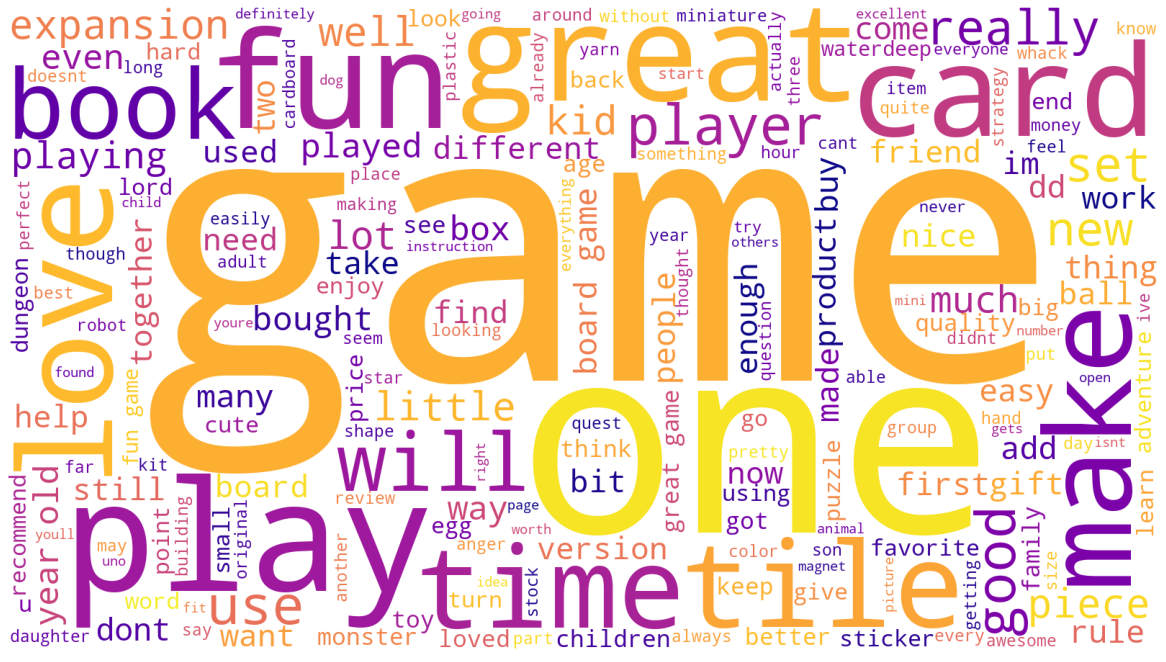

In [35]:
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [36]:
# Create a wordcloud without stop words.
# Summary: Create a word cloud.
wordclouds = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(sumtoken_string) 

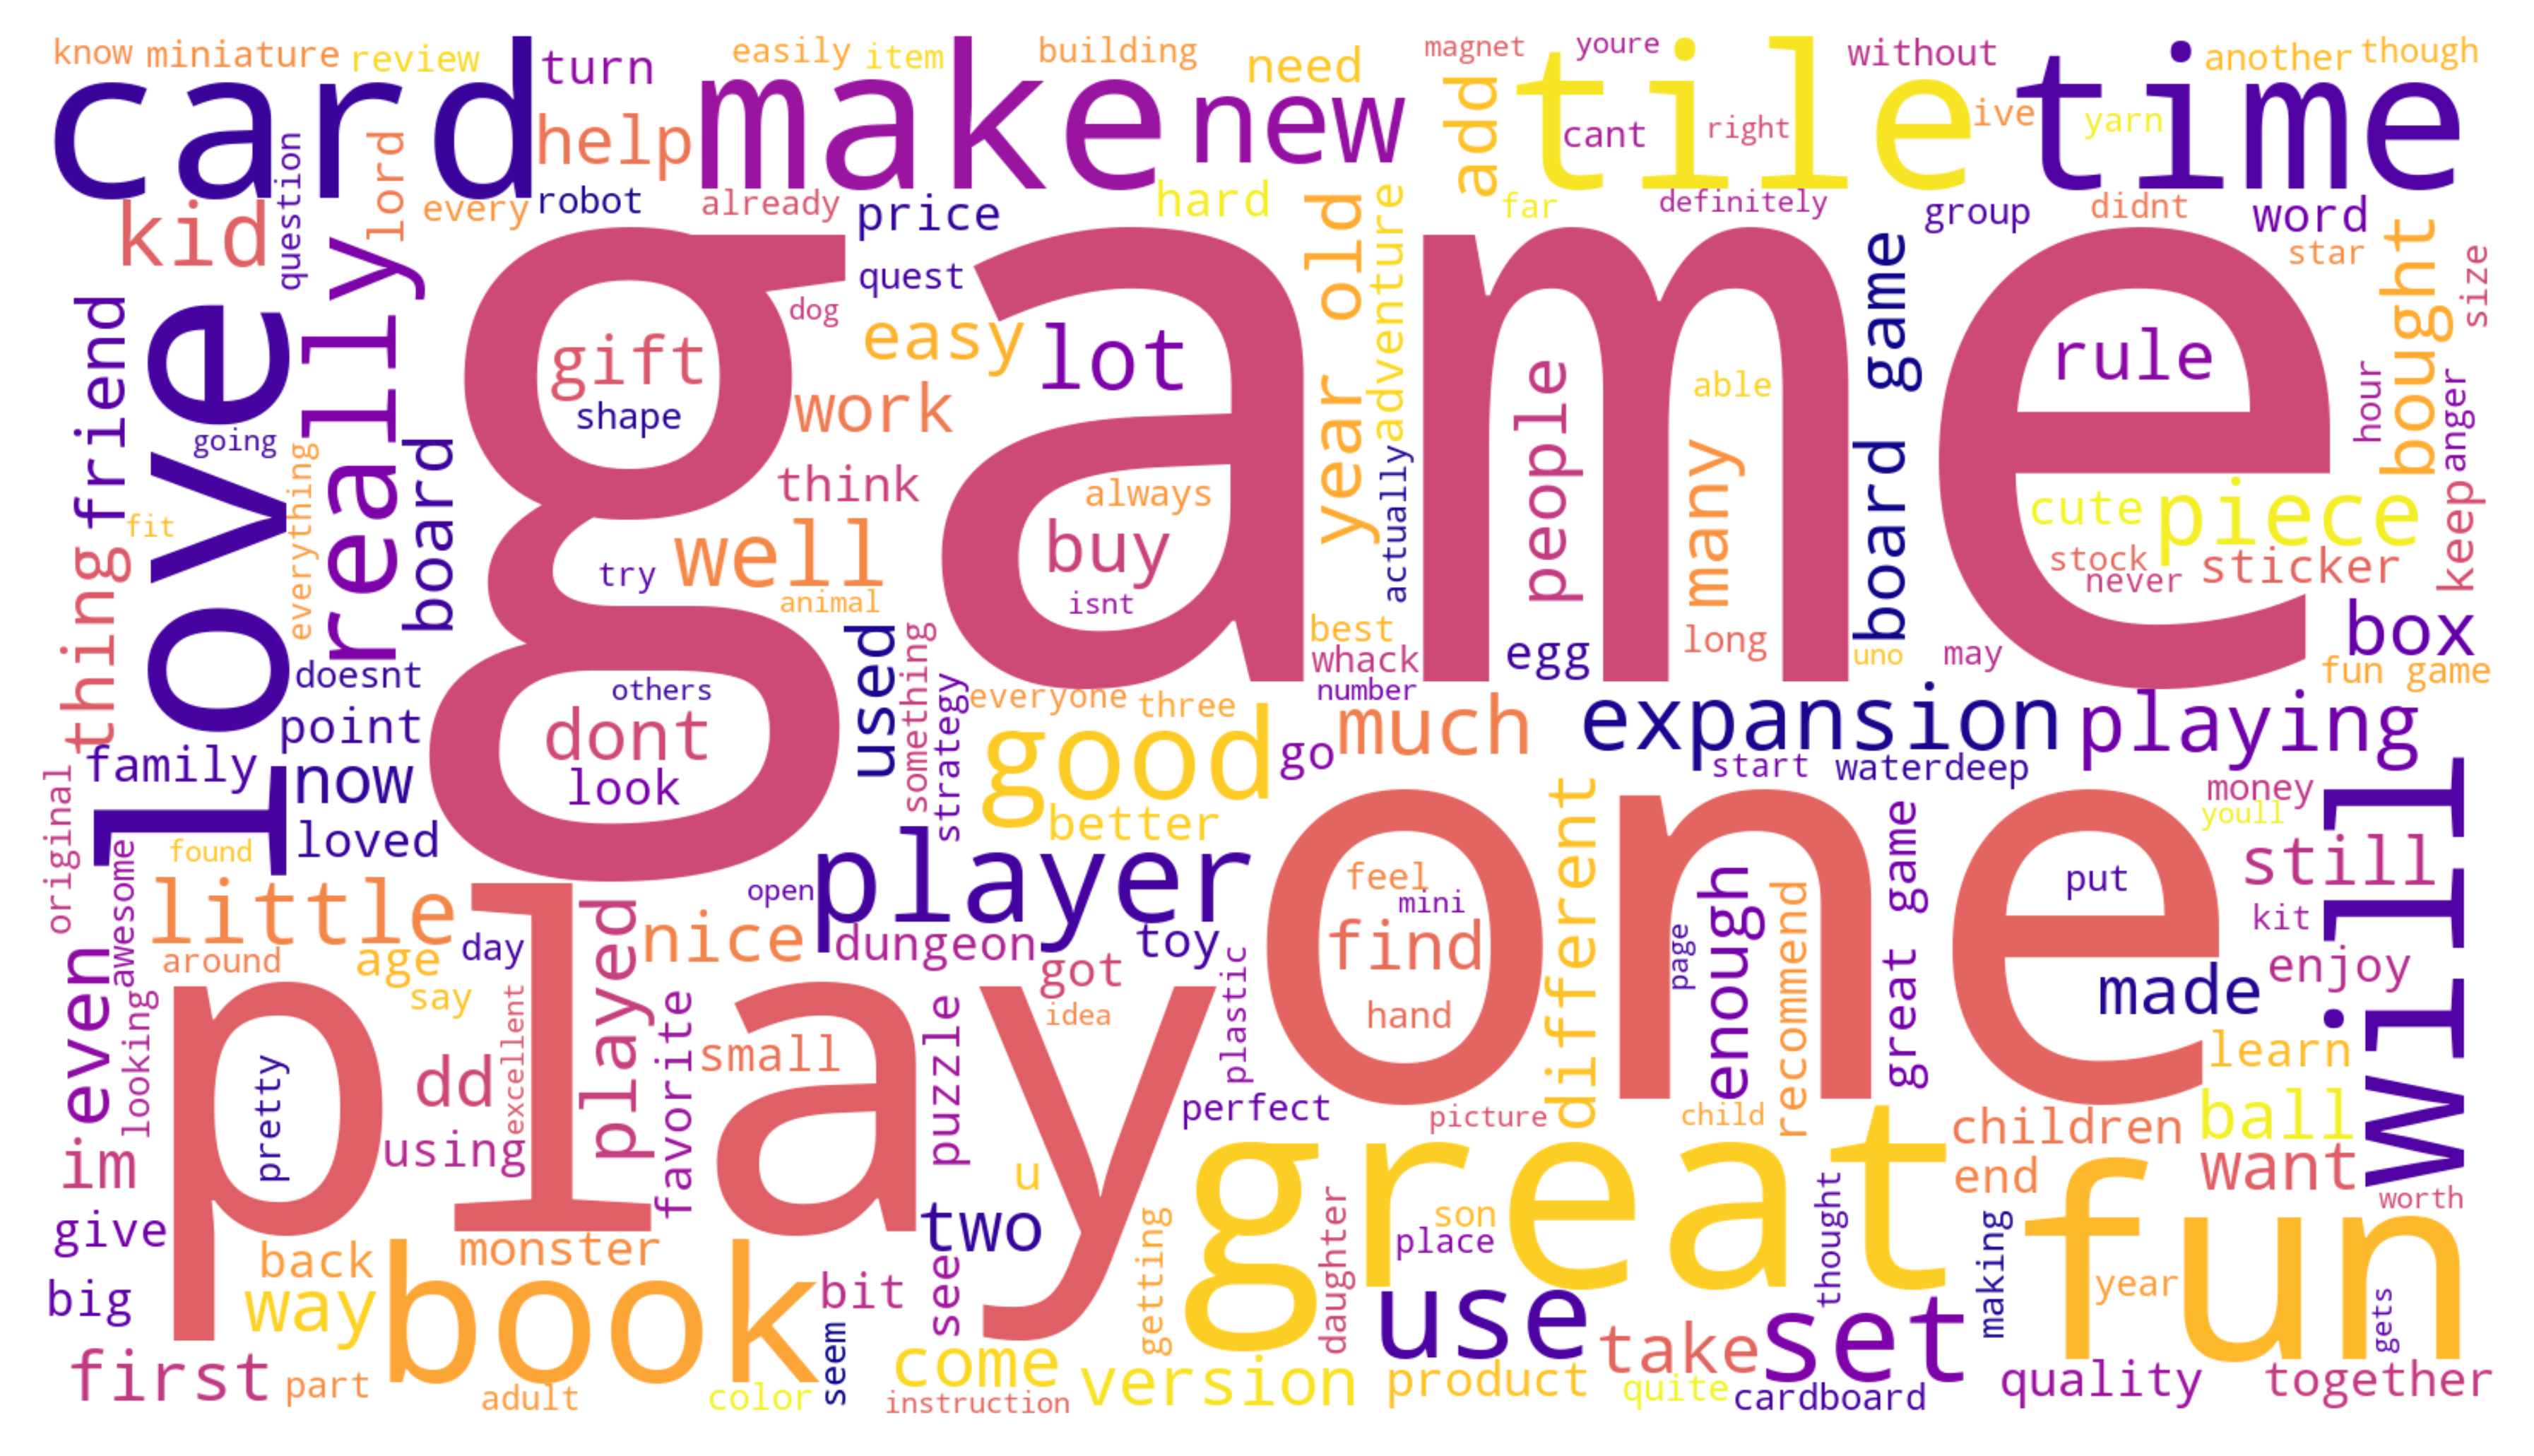

In [37]:
# Plot the wordcloud image.
# Summary: Plot the WordCloud image.
fig = plt.figure(figsize=(9, 7), dpi=500)
plt.imshow(wordclouds, interpolation='bilinear')
plt.axis("off")
plt.show()

### 4d) Identify 15 most common words and polarity

In [38]:
# Determine the 15 most common words for reviews.
fdist_rev = FreqDist(revtoken)

# Preview the data.
fdist_rev

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [39]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
countsreview = pd.DataFrame(Counter(revtoken).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
countsreview

Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

In [40]:
# Determine the 15 most common words for summary.
fdist_sum = FreqDist(sumtoken)

# Preview the data.
fdist_sum

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [41]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
countssummary = pd.DataFrame(Counter(sumtoken).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
countssummary

Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [42]:
!pip install -U textblob

In [86]:
# create a lambda function to generate polarity scores
polarity_score = lambda x: TextBlob(str(x)).sentiment.polarity


In [87]:
# Determine polarity of both columns. 

# apply the lambda function to each object in the 'review' column and create a new column 'review_polarity'
df3copy['review_polarity'] = df3copy['review'].apply(polarity_score)


In [88]:
# apply the lambda function to each object in the 'summary' column and create a new column 'summary_polarity'
df3copy['summary_polarity'] = df3copy['summary'].apply(polarity_score)

In [89]:
# View output.
print(df3copy)

      index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game did not think i would like it when ...   
1958   1997           great game for all keeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        prett

In [90]:
# define function to calculate sentiment score
def get_sentiment(review):
    blob = TextBlob(review)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

In [91]:
df3copy['sentiment_score_review'] = df3copy['review'].apply(get_sentiment)

In [92]:
df3copy['sentiment_score_summary'] = df3copy['summary'].apply(get_sentiment)
# View output.
print(df3copy)

      index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1956   1995  the perfect word game for mixed ages with mom ...   
1957   1996  great game did not think i would like it when ...   
1958   1997           great game for all keeps the mind nimble   
1959   1998                                           fun game   
1960   1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        prett

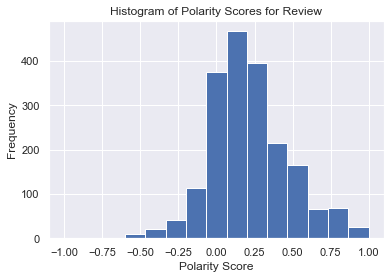

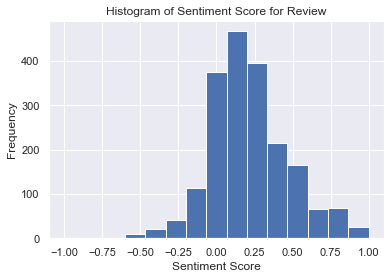

In [93]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.hist(df3copy['review_polarity'], bins=15)
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Polarity Scores for Review')
plt.show()


# Histogram of sentiment score
plt.hist(df3copy['sentiment_score_review'], bins=15)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Score for Review')
plt.show()

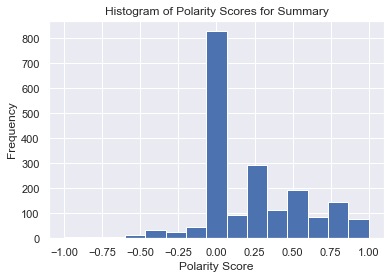

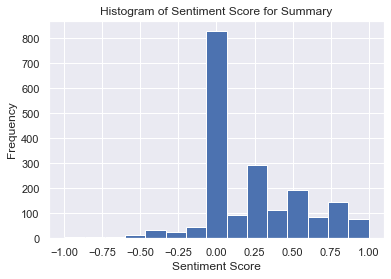

In [94]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.hist(df3copy['summary_polarity'], bins=15)
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Polarity Scores for Summary')
plt.show()

# Histogram of sentiment score
plt.hist(df3copy['sentiment_score_summary'], bins=15)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Score for Summary')
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [95]:
# Top 20 negative reviews.
df_sorted_asc = df3copy.sort_values(by='review_polarity', ascending=True)

# View output.
top_neg_reviews = df_sorted_asc.head(20)['review'].tolist()
top_neg_reviews

['booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not',
 'incomplete kit very disappointing',
 'im sorry i just find this product to be boring and to be frank juvenile',
 'one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it',
 'expensive for what you get',
 'i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift',
 'i found the directions difficult',
 'instructions are complicated to follow',
 'difficult',
 'this was a gift for my daughter i found it difficult to use',
 'i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the 

In [96]:
# Top 20 negative summaries.
df_sorted_asc2 = df3copy.sort_values(by='summary_polarity', ascending=True)


# View output.
top_neg_summary = df_sorted_asc2.head(20)['summary'].tolist()
top_neg_summary

['boring unless you are a craft person which i am ',
 'the worst value ive ever seen',
 'boring',
 'before this i hated running any rpg campaign dealing with towns because it ',
 'another worthless dungeon masters screen from galeforce9',
 'disappointed',
 'disappointed',
 'disappointed',
 'disappointed',
 'promotes anger instead of teaching calming methods',
 'too bad this is not what i was expecting',
 'bad qualityall made of paper',
 'at age 31 i found these very difficult to make ',
 'mad dragon',
 'small and boring',
 'disappointing',
 'disappointing',
 'disappointing',
 'disappointing',
 'then you will find this board game to be dumb and boring']

In [97]:
# Top 20 positive reviews.
df_sorted_desc = df3copy.sort_values(by='review_polarity', ascending=False)


# View output.
top_pos_reviews = df_sorted_desc.head(20)['review'].tolist()
top_pos_reviews

['perfect',
 'excellent toy to simulate thought',
 'awesome gift',
 'perfect for tutoring my grandson in spelling',
 'awesome addition to my rpg gm system',
 'best set buy 2 if you have the means',
 'perfect just what i ordered',
 'awesome toy',
 'it is the best thing to play with and also mind blowing in some ways',
 'wonderful for my grandson to learn the resurrection story',
 'awesome set',
 'this was perfect to go with the 7 bean bags  i just wish they were not separate orders',
 'one of the best board games i played in along time',
 'delightful product',
 'its awesome',
 'came in perfect condition',
 'awesome book',
 'wonderful product',
 'awesome',
 'excellent activity for teaching selfmanagement skills']

In [98]:
# Top 20 positive summaries.
df_sorted_desc2 = df3copy.sort_values(by='summary_polarity', ascending=False)


# View output.
top_pos_summary = df_sorted_desc2.head(20)['summary'].tolist()
top_pos_summary

['one of the best',
 'excellent',
 'one of the best games ever',
 'awesome learning tool',
 'he was very happy with his gift',
 'best orcs from wotc',
 'awesome expansion',
 'perfect gift',
 'awesome sticker activity for the price',
 'awesome',
 'wonderful',
 'all f the mudpuppy toys are wonderful',
 'the perfect gift for preschool construction fans',
 'best dungeon crawler',
 'awesome puzzle',
 'the best among the dd boardgames',
 'awesome addition to our dd antics',
 'awesome book',
 'wonderful and',
 'awesome expansion']

## 7. Discuss: Insights and observations

***Your observations here...***

In [ ]:
# We tokenized and cleaned the text from both reviews and summaries, removing common stop words to focus
# on meaningful terms. We then created word clouds to visualize the most common words in the dataset.

# We also created histograms to visualize the distribution of these scores. Most scores ranged between 0 and 1, 
# indicating that the majority of reviews and summaries had a positive sentiment and polarity.

# 